In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

$SST = SSR + SSE$

$ SST( 실제값- 평균값)^2 의합$ (y-y.mean)**2 <br>
$ SSR( 예측값- 평균값)^2 의합$ (hy-y.mean)**2<br>
$ SSE( 실제값- 예측값)^2 의합$ (y-hy)**2 <br>
$ R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}   $

# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(b + w x) 
\end{equation}
\begin{equation}
\hat{y} = \sigma(b + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

In [51]:
x = np.array( [1., 2., 3., 4., 5., 6.] )
y = np.array( [ 5.,  7.,  9., 11., 13., 15.] )

In [52]:
# 초기값 설정
w = 0 # weight
b = 0 # bias
n = len(x)
epochs = 500
learning_reate = 0.01

In [53]:
# 선형 분석
# y-hy 
for i in range(epochs):
    hy = w*x +b # w=2, b=3
    cost = np.sum((y-hy)**2) / n
    # cost = np.sum((w*x+b)**2) / n

    gradientW = np.sum(2*(w*x+b-y) * x)/n # w에 대한 미분
    gradientB = np.sum(2*(w*x+b-y))/n # b에 대한 미분
    w = w-learning_reate*gradientW
    b = b-learning_reate*gradientB

    if i % 100 == 0:
        print(f'epochs: {i}, cost: {cost}, w: {w}, b:{b}')

print(f'w={w}')
print(f'b={b}')



epochs: 0, cost: 111.66666666666667, w: 0.8166666666666668, b:0.2
epochs: 100, cost: 0.5342873401160694, w: 2.387793668244803, b:1.339778329300845
epochs: 200, cost: 0.2571632313800838, w: 2.2690405295020555, b:1.8481840887259684
epochs: 300, cost: 0.12377783003332864, w: 2.1866528838450576, b:2.200901953709994
epochs: 400, cost: 0.059576756465295755, w: 2.1294946122510163, b:2.445607860306259
w=2.0901688487677124
b=2.613969259932193


## logistic 정답이 0 또는 1로 구성
- 선형을 구부림
- 시그모이드를 통과

In [37]:
x = np.array( [1., 2., 3., 4., 5., 6.] )
y = np.array( [ 0.,  0.,  0., 1., 1., 1.] )

In [44]:
w = 0 # weight
b = 0 # bias
n = len(x)
epochs = 500
learning_reate = 0.01

In [45]:
# 시그모이드함수
def sigmoid(z):
    return 1/ (1+math.e ** -z)

In [46]:
# cost 함수 (sigmoid 함수 통과)
def cost(x,y,w):
    n = len(x)
    z = w*x
    hy = sigmoid(z) # 활성함수
    loss = np.sum((y-hy)**2)/n # sigmoid를 통과하면 그대로 사용할수 없음, 매끄럽게 만드는 작업 필요
    return loss

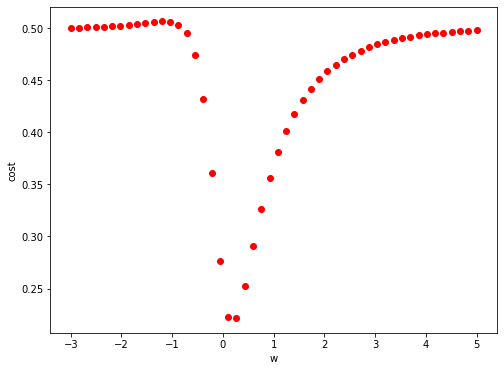

In [47]:
# 매끄러운 곡선이 나오지않음 펴는 작업을 해야함

plt.figure(figsize=(8,6))
plt.xlabel('w')
plt.ylabel('cost')

for w in np.linspace(-3,5,50):
    c  = cost(x, y,w)
    plt.plot(w,c,'ro')
plt.show()

In [48]:
for i in range(epochs):
    z = w*x +b # w=2, b=3
    hy = sigmoid(z) # 0~1 사이의 값
    cost = np.sum((y-hy)**2) / n

    gradientW = np.sum(2*(w*x+b-y) * x)/n # w에 대한 미분
    gradientB = np.sum(2*(w*x+b-y))/n # b에 대한 미분
    w = w-learning_reate*gradientW
    b = b-learning_reate*gradientB

    if i % 100 == 0:
        print(f'epochs: {i}, cost: {cost}, w: {w}, b:{b}')

print(f'w={w}')
print(f'b={b}')

epochs: 0, cost: 0.4977612811540211, w: 3.533333333333333, b:-0.34
epochs: 100, cost: 0.1528763875344625, w: 0.3655166249760274, b:-0.8639696122587718
epochs: 200, cost: 0.16212107144587704, w: 0.3323295821194056, b:-0.7218892941701247
epochs: 300, cost: 0.16884465498200063, w: 0.3093053289819963, b:-0.6233178961805645
epochs: 400, cost: 0.17365575319053794, w: 0.2933317384808549, b:-0.5549317844915825
w=0.28234166434970315
b=-0.5078810956092406
